# Nash Q learning basic implementation

In [60]:
import numpy as np
import nashpy as nash
import ipywidgets as widgets
from IPython.display import display

In [61]:
loadingBar = widgets.IntProgress(
    value=0,
    min=0,
    max=100,
    step=1,
    description='Loading:',
    bar_style='info',
)

In [62]:
Q = 4 #Number of games
N = 2 #Number of players
A = 2 #Number of actions per player

In [63]:
Q = 2 #Number of games
N = 2 #Number of players
A = 2 #Number of actions per player

In [64]:
TRANSITION_MATRIX = np.array(
    [
        # Player 1 - Action 0
        [
            # Player 2 - Action 0 - .1 .3
            [
                
                [0, 0.5, 0, 0.5],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0.5, 0, 0, 0.5]
                
            ],

            # Player 2 - Action 1 .2 .3
            [
                
                [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ]
        ],

        # Player 1 - Action 1
        [
            # Player 2 - Action 0 .1 .4
            [
                
                [1, 0, 0, 0],
                [0, 0, 0, 1],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ],

            # Player 2 - Action 1 .2 .4
            [
                
                [0, 0.5, 0, 0.5],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ]
        ]
    ]
)

In [65]:
# Player1 action / Player2 action / starting state / ending state / probability
#Player 1 - column player - 0: .3, 1: .4
#Player 2 - row player - 0: .1, 1: .2
TRANSITION_MATRIX = np.array(
    [
        # Player 1 - Action 0
        [
            # Player 2 - Action 0 - .1 .3
            [
                [1, 0],
                [1, 0],                
            ],

            # Player 2 - Action 1 .2 .3
            [
                [1, 0],
                [1, 0],                
            ],
        ],

        # Player 1 - Action 1
        [
            # Player 2 - Action 0 .1 .4
            [
                [1, 0],
                [1, 0],                
            ],

            # Player 2 - Action 1 .2 .4
            [
                [0, 1],
                [0, 1],                
            ],
        ]
    ]
)

In [66]:
# state / player1 action / player2 action / [player1 reward, player2 reward]
PAYOFF_MATRIX = np.array([
    # State 0
    [
        [ [2, 1], [0, 0] ],
        [ [0, 0], [1, 2] ]
    ],
    # State 1
    [
        [ [1, 1], [3, 0] ],
        [ [0, 3], [2, 2] ]
    ],
    # State 
    [
        [ [2, 0], [0, 2] ],
        [ [0, 1], [1, 0] ]
    ],
    # State 33
    [
        [ [1, 1], [0, 0] ],
        [ [0, 0], [2, 2] ]
    ],
])

In [101]:
# state / player1 action / player2 action / [player1 reward, player2 reward]
PAYOFF_MATRIX = np.array([
    # State 0
    [
        [ [0, 0], [-1, -1] ],
        [ [-1, -1], [0, 0] ]
    ],
    # State 1
    [
        [ [-1, -1], [0, 0] ],
        [ [0, 0], [1, 1] ]
    ],
])

In [102]:
# state / [player1 chosen action, player2 chosen action]
strategy = np.array([
    # State 0
    [
        [1, 1],
    ],
    # State 1
    [
        [1, 1]
    ],
])

In [103]:
PAYOFF_MATRIX[0, :, :, 0]

array([[ 0, -1],
       [-1,  0]])

In [104]:
def transition_probability(state, player1_action, player2_action, next):
    return TRANSITION_MATRIX[player1_action, player2_action, state, next]

In [105]:
def reward(state, player1_action, player2_action):
    return PAYOFF_MATRIX[state, player1_action, player2_action]

In [106]:
n_games = 500
state = 0
totalReward = np.array([0, 0])
randomRewards = []

gamesLoadingBarRandom = widgets.IntProgress(
    value=0,
    min=0,
    max=n_games-1,
    step=1,
    description='Games:',
    bar_style='info',
)

display(gamesLoadingBarRandom)

for _ in range(n_games):
    print("State:", state)
    player1_action = np.random.choice(A, p=[0.5, 0.5])
    player2_action = np.random.choice(A, p=[0.5, 0.5])
    print("Player 1 action:", player1_action)
    print("Player 2 action:", player2_action)
    next_state = np.random.choice(range(Q), p=TRANSITION_MATRIX[player1_action, player2_action, state])
    print("Next state:", next_state)
    r = reward(state, player1_action, player2_action)
    print("Reward:", r)
    state = next_state
    totalReward += r
    randomRewards.append(r)
    gamesLoadingBarRandom.value += 1
print("Total reward:", totalReward / n_games)

IntProgress(value=0, bar_style='info', description='Games:', max=9999)

State: 0
Player 1 action: 1
Player 2 action: 1
Next state: 1
Reward: [0 0]
State: 1
Player 1 action: 1
Player 2 action: 0
Next state: 0
Reward: [0 0]
State: 0
Player 1 action: 1
Player 2 action: 0
Next state: 0
Reward: [-1 -1]
State: 0
Player 1 action: 0
Player 2 action: 1
Next state: 0
Reward: [-1 -1]
State: 0
Player 1 action: 0
Player 2 action: 1
Next state: 0
Reward: [-1 -1]
State: 0
Player 1 action: 0
Player 2 action: 1
Next state: 0
Reward: [-1 -1]
State: 0
Player 1 action: 0
Player 2 action: 1
Next state: 0
Reward: [-1 -1]
State: 0
Player 1 action: 1
Player 2 action: 0
Next state: 0
Reward: [-1 -1]
State: 0
Player 1 action: 1
Player 2 action: 1
Next state: 1
Reward: [0 0]
State: 1
Player 1 action: 1
Player 2 action: 1
Next state: 1
Reward: [1 1]
State: 1
Player 1 action: 1
Player 2 action: 0
Next state: 0
Reward: [0 0]
State: 0
Player 1 action: 0
Player 2 action: 1
Next state: 0
Reward: [-1 -1]
State: 0
Player 1 action: 1
Player 2 action: 1
Next state: 1
Reward: [0 0]
State: 1
Pl

In [107]:
def computeNashEq(state, payoff_matrix):
    game = nash.Game(payoff_matrix[state, :, :, 0], PAYOFF_MATRIX[state, :, :, 1])
    eqs = game.vertex_enumeration()

    try:
        eq = next(eqs)
        return np.abs(eq)
    except Exception:
        a = 1
        b = 0
        return [[a, 1 - a], [b, 1 - b]]
    

In [108]:
#computeNashEq(3, PAYOFF_MATRIX)

In [109]:
#Simulate plays with nash policy
state = 0
totalReward = np.array([0, 0])
localNashRewards = []
EPSILON = 0.1

gamesLoadingBarLocalNash = widgets.IntProgress(
    value=0,
    min=0,
    max=n_games-1,
    step=1,
    description='Games:',
    bar_style='info',
)

display(gamesLoadingBarLocalNash)

for _ in range(n_games):
    print("State:", state)
    nashEq = computeNashEq(state, PAYOFF_MATRIX)
    print("Nash equilibrium:", nashEq)
    player1_action = np.random.choice(A, p=nashEq[0]) if np.random.rand() > EPSILON else np.random.choice(A)
    player2_action = np.random.choice(A, p=nashEq[1]) if np.random.rand() > EPSILON else np.random.choice(A)
    print("Player 1 action:", player1_action)
    print("Player 2 action:", player2_action)
    next_state = np.random.choice(range(Q), p=TRANSITION_MATRIX[player1_action, player2_action, state])
    print("Next state:", next_state)
    r = reward(state, player1_action, player2_action)
    print("Reward:", r)
    state = next_state
    totalReward += r
    localNashRewards.append(r)
    gamesLoadingBarLocalNash.value += 1
print("Total reward:", totalReward/n_games)

IntProgress(value=0, bar_style='info', description='Games:', max=9999)

State: 0
Nash equilibrium: [[0. 1.]
 [0. 1.]]
Player 1 action: 1
Player 2 action: 1
Next state: 1
Reward: [0 0]
State: 1
Nash equilibrium: [[5.55111512e-17 1.00000000e+00]
 [5.55111512e-17 1.00000000e+00]]
Player 1 action: 1
Player 2 action: 1
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[5.55111512e-17 1.00000000e+00]
 [5.55111512e-17 1.00000000e+00]]
Player 1 action: 1
Player 2 action: 1
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[5.55111512e-17 1.00000000e+00]
 [5.55111512e-17 1.00000000e+00]]
Player 1 action: 1
Player 2 action: 1
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[5.55111512e-17 1.00000000e+00]
 [5.55111512e-17 1.00000000e+00]]
Player 1 action: 1
Player 2 action: 1
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[5.55111512e-17 1.00000000e+00]
 [5.55111512e-17 1.00000000e+00]]
Player 1 action: 1
Player 2 action: 1
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[5.55111512e-17 1.00000000e+00]
 [5.55111512e-17 1.00000000e

In [110]:
qTables = [ np.zeros((Q, A, A, N)) for _ in range(N)]

In [111]:
for i in range(N):
    computeNashEq(0, qTables[i])

C:\Users\Paolo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nashpy\polytope\polytope.py:109: RuntimeWarning: divide by zero encountered in divide
  hs = HalfspaceIntersection(halfspaces, feasible_point)
C:\Users\Paolo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nashpy\polytope\polytope.py:109: RuntimeWarning: invalid value encountered in divide
  hs = HalfspaceIntersection(halfspaces, feasible_point)


In [112]:
def expectedPayoff(payoff_matrix, player1_strategy, player2_strategy):
    expected_payoff = np.dot(np.dot(player1_strategy, payoff_matrix), player2_strategy)
    return expected_payoff
    

In [113]:
print(PAYOFF_MATRIX[0, :, :])

[[[ 0  0]
  [-1 -1]]

 [[-1 -1]
  [ 0  0]]]


In [114]:
#expectedPayoff(PAYOFF_MATRIX[2, :, :, 1], np.array([0.5, .5]), np.array([1, 0]))

In [115]:
#NashQ
ALPHA = 0.5
GAMMA = 0.8
EPSILON = 0.5
PURE_TRAINING_EPISODES = 100000000
# n_games = 5000

qTables = [np.zeros((Q, A, A, N)) for _ in range(N)] #QTable for each player

state = 0
totalReward = [np.array([0, 0]) for _ in range(N)]
diffs = [[]for _ in range(N)]
NashQRewards = [[]for _ in range(N)]
NashEquilibria = [[]for _ in range(N)]

gamesLoadingBarNashQ = widgets.IntProgress(
      value=0,
      min=0,
      max=n_games-1,
      step=1,
      description='Games:',
      bar_style='info',
)

display(gamesLoadingBarNashQ)

playerLoadingBar = widgets.IntProgress(
      value=0,
      min=0,
      max=N-1,
      step=1,
      description='Players:',
      bar_style='info',
)

display(playerLoadingBar)

for t in range(n_games):
   ALPHA = 1 / (t + 1 - PURE_TRAINING_EPISODES) if t >= PURE_TRAINING_EPISODES else ALPHA
   player1_action = np.random.choice(A, p=nashEq[0]) if np.random.rand() > EPSILON else np.random.choice(A)
   player2_action = np.random.choice(A, p=nashEq[1]) if np.random.rand() > EPSILON else np.random.choice(A)
   #print("Player 1 action:", player1_action)
   #print("Player 2 action:", player2_action)
   next_state = np.random.choice(range(Q), p=TRANSITION_MATRIX[player1_action, player2_action, state])
   #print("Next state:", next_state)
   r = reward(state, player1_action, player2_action)
   #print("Reward:", r)
   for i in range(N):
      playerLoadingBar.value = i
      qTable = qTables[i]

      #print("State:", state)
      nashEq = np.abs(computeNashEq(state, qTable))
      # print("Nash equilibrium:", nashEq)
      NashEquilibria[i].append(nashEq)

      next_NashEq = computeNashEq(next_state, qTable)
      next_qVal_0 = expectedPayoff(qTable[next_state, :, :, 0], next_NashEq[0], next_NashEq[1])
      next_qVal_1 = expectedPayoff(qTable[next_state, :, :, 1], next_NashEq[0], next_NashEq[1])
      oldQ = qTable[state, player1_action, player2_action].copy()
      qTable[state, player1_action, player2_action, 0] = (1 - ALPHA) * qTable[state, player1_action, player2_action, 0] + ALPHA * (r[0] + GAMMA * next_qVal_0)
      qTable[state, player1_action, player2_action, 1] = (1 - ALPHA) * qTable[state, player1_action, player2_action, 1] + ALPHA * (r[1] + GAMMA * next_qVal_1)

      diffs[i].append(qTable[state, player1_action, player2_action] - oldQ)
      # print("QTable:", qTable[state])
      
      totalReward[i] += r
      NashQRewards[i].append(r)
   state = next_state
   gamesLoadingBarNashQ.value += 1
for i in range(N):
   print("Expected reward:", totalReward[i]/n_games)
for i in range(N):
   print("QTable:", qTables[i])

IntProgress(value=0, bar_style='info', description='Games:', max=9999)

IntProgress(value=0, bar_style='info', description='Players:', max=1)

Expected reward: [0.1188 0.1188]
Expected reward: [0.1188 0.1188]
QTable: [[[[3.2 3.2]
   [2.2 2.2]]

  [[2.2 2.2]
   [4.  4. ]]]


 [[[2.2 2.2]
   [3.2 3.2]]

  [[3.2 3.2]
   [5.  5. ]]]]
QTable: [[[[3.2 3.2]
   [2.2 2.2]]

  [[2.2 2.2]
   [4.  4. ]]]


 [[[2.2 2.2]
   [3.2 3.2]]

  [[3.2 3.2]
   [5.  5. ]]]]


In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
for i in range(N):
    diffs[i] = np.array(diffs[i])
    print(diffs[i].shape)
    diffs[i]
    NashQRewards[i] = np.array(NashQRewards[i])

randomRewards = np.array(randomRewards)
localNashRewards = np.array(localNashRewards)
NashQRewards = np.array(NashQRewards)
diffs = np.array(diffs)

(10000, 2)
(10000, 2)


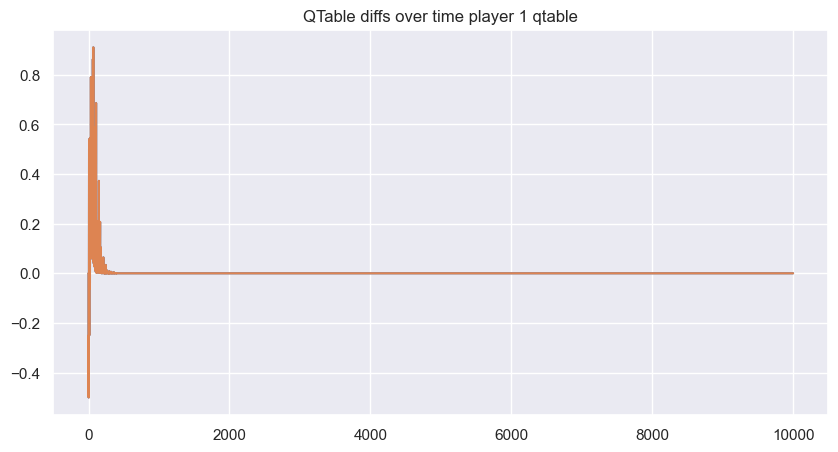

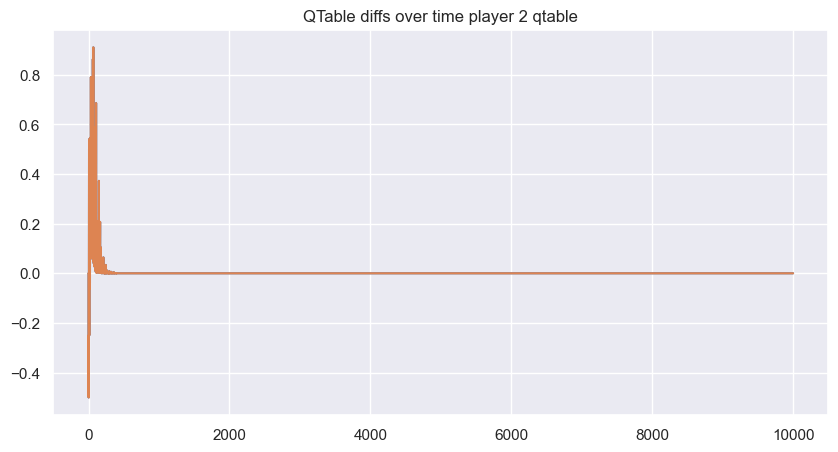

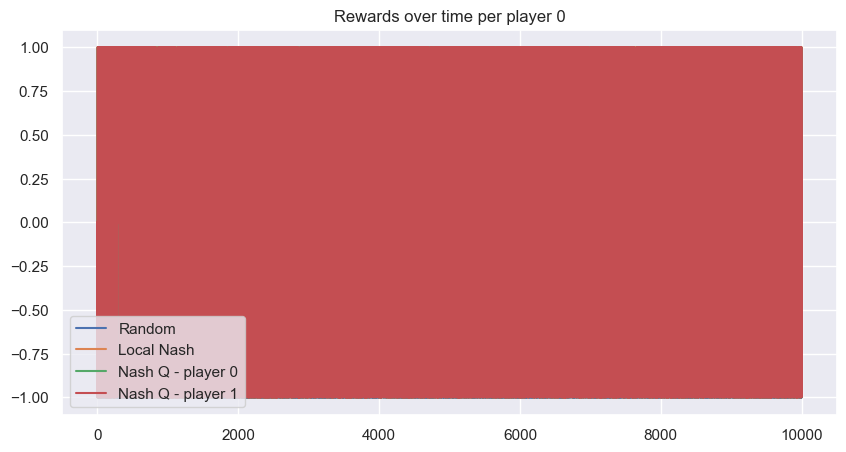

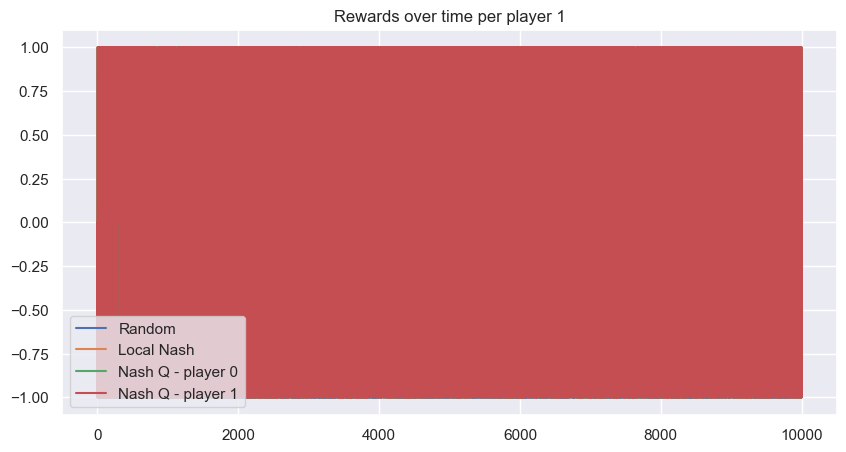

In [118]:
sns.set_theme()

plt.figure(figsize=(10, 5))
plt.title("QTable diffs over time player 1 qtable")
for i in range(N):
    sns.lineplot(data=diffs[i, :, 0])
plt.show()

plt.figure(figsize=(10, 5))
plt.title("QTable diffs over time player 2 qtable")
for i in range(N):
    sns.lineplot(data=diffs[i, :, 1])
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Rewards over time per player 0")
sns.lineplot(data=randomRewards[:, 0], label="Random")
sns.lineplot(data=localNashRewards[:, 0], label="Local Nash")
for i in range(N):
    sns.lineplot(data=NashQRewards[i, :, 0], label="Nash Q - player "+str(i))

plt.figure(figsize=(10, 5))
plt.title("Rewards over time per player 1")
sns.lineplot(data=randomRewards[:, 1], label="Random")
sns.lineplot(data=localNashRewards[:, 1], label="Local Nash")
for i in range(N):
    sns.lineplot(data=NashQRewards[i, :, 1], label="Nash Q - player "+str(i))

plt.show()

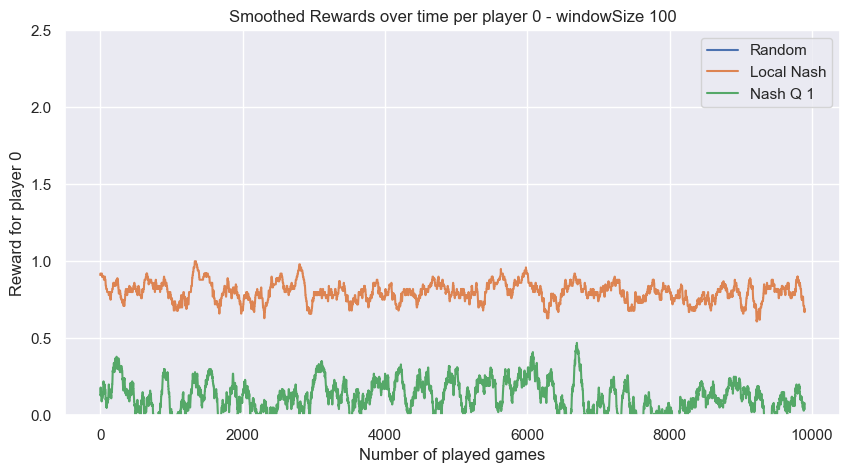

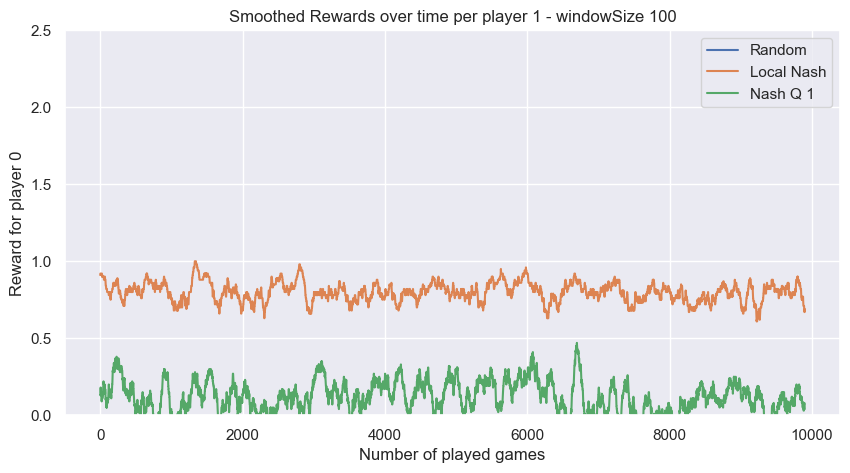

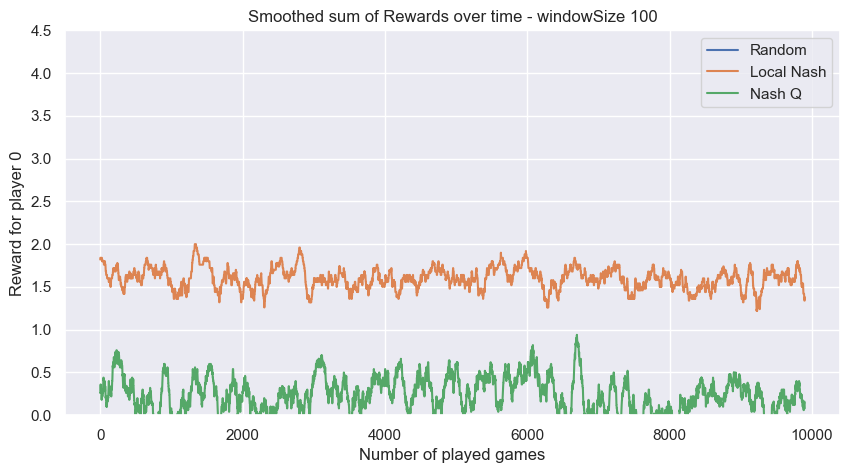

In [119]:
# smooth the data
window = 100
cumsum = np.cumsum(randomRewards[:, 0])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
randomRewardsSmooth_0 = cumsum[window - 1:] / window

cumsum = np.cumsum(localNashRewards[:, 0])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
localNashRewardsSmooth_0 = cumsum[window - 1:] / window

cumsum = np.cumsum(NashQRewards[0][:, 0])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
NashQRewardsSmooth_0 = cumsum[window - 1:] / window

plt.figure(figsize=(10, 5))
plt.title(f"Smoothed Rewards over time per player 0 - windowSize {window}")
sns.lineplot(data=randomRewardsSmooth_0, label="Random")
sns.lineplot(data=localNashRewardsSmooth_0, label="Local Nash")
sns.lineplot(data=NashQRewardsSmooth_0, label="Nash Q "+str(i))
plt.ylim(0, 2.5)
plt.xlabel("Number of played games")
plt.ylabel("Reward for player 0")
plt.show()

cumsum = np.cumsum(randomRewards[:, 1])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
randomRewardsSmooth_1 = cumsum[window - 1:] / window

cumsum = np.cumsum(localNashRewards[:, 1])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
localNashRewardsSmooth_1 = cumsum[window - 1:] / window

cumsum = np.cumsum(NashQRewards[0][:, 1])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
NashQRewardsSmooth_1 = cumsum[window - 1:] / window


plt.figure(figsize=(10, 5))
plt.title(f"Smoothed Rewards over time per player 1 - windowSize {window}")
sns.lineplot(data=randomRewardsSmooth_1, label="Random")
sns.lineplot(data=localNashRewardsSmooth_1, label="Local Nash")
sns.lineplot(data=NashQRewardsSmooth_1, label="Nash Q "+str(i))
plt.ylim(0, 2.5)
plt.xlabel("Number of played games")
plt.ylabel("Reward for player 0")
plt.show()

randomRewardsSmooth_sum = randomRewardsSmooth_0 + randomRewardsSmooth_1
localNashRewardsSmooth_sum = localNashRewardsSmooth_0 + localNashRewardsSmooth_1
NashQRewardsSmooth_sum = NashQRewardsSmooth_0 + NashQRewardsSmooth_1

plt.figure(figsize=(10, 5))
plt.title(f"Smoothed sum of Rewards over time - windowSize {window}")
sns.lineplot(data=randomRewardsSmooth_sum, label="Random")
sns.lineplot(data=localNashRewardsSmooth_sum, label="Local Nash")
sns.lineplot(data=NashQRewardsSmooth_sum, label="Nash Q")
plt.ylim(0, 4.5)
plt.xlabel("Number of played games")
plt.ylabel("Reward for player 0")
plt.show()